In [13]:
def read_tsp(filename):
    """
    Read a file in .tsp format into a pandas DataFrame
    The .tsp files can be found in the TSPLIB project. Currently, the library
    only considers the possibility of a 2D map.
    """
    with open(filename) as f:
        node_coord_start = None
        dimension = None
        lines = f.readlines()

        # Obtain the information about the .tsp
        i = 0
        while not dimension or not node_coord_start:
            line = lines[i]
            if line.startswith('DIMENSION :'):
                dimension = int(line.split()[-1])
            if line.startswith('NODE_COORD_SECTION'):
                node_coord_start = i
            i = i+1

        print('Problem with {} cities read.'.format(dimension))

        f.seek(0)

        # Read a data frame out of the file descriptor
        cities = pd.read_csv(
            f,
            skiprows=node_coord_start + 1,
            sep=' ',
            names=['city', 'y', 'x'],
            dtype={'city': str, 'x': np.float64, 'y': np.float64},
            header=None,
            nrows=dimension
        )

        # cities.set_index('city', inplace=True)

        return cities
    
def normalize(points):
    """
    Return the normalized version of a given vector of points.
    For a given array of n-dimensions, normalize each dimension by removing the
    initial offset and normalizing the points in a proportional interval: [0,1]
    on y, maintining the original ratio on x.
    """
    ratio = (points.x.max() - points.x.min()) / (points.y.max() - points.y.min()), 1
    ratio = np.array(ratio) / max(ratio)
    norm = points.apply(lambda c: (c - c.min()) / (c.max() - c.min()))
    return norm.apply(lambda p: ratio * p, axis=1)

Problem with 194 cities read.


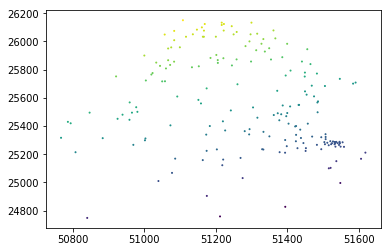

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
a = read_tsp('qa194.tsp')
X = []
Y = []
for i in range(194):
    X.append(a['x'][i])
    Y.append(a['y'][i])
T = np.arctan2(Y, X)
plt.scatter(X, Y, c=T, s=1)
plt.show()



In [30]:
df = a[['x','y']].values
print(df)

[[21366.6667 59766.6667]
 [22966.6667 59816.6667]
 [23066.6667 59816.6667]
 ...
 [26850.     69950.    ]
 [27300.     69950.    ]
 [27850.     70083.3333]]


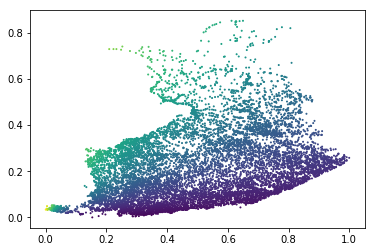

In [25]:
b = normalize(a[['x', 'y']])

X = []
Y = []
for i in range(10638):
    X.append(b['x'][i])
    Y.append(b['y'][i])
T = np.arctan2(Y, X)
plt.scatter(X, Y, c=T, s=1)
plt.show()